<div style="text-align: center;">
    <h1> <font style="bold"> Trabajo Práctico 1 </font></h1>
    <h2><font style="bold">Especialización en Inteligencia Artificial</font></h2>
    <h2><font style="bold">Probabilidad y Estadistica</font></h2>
    <h3><font style="bold">Abril Noguera</font></h3>
</div>

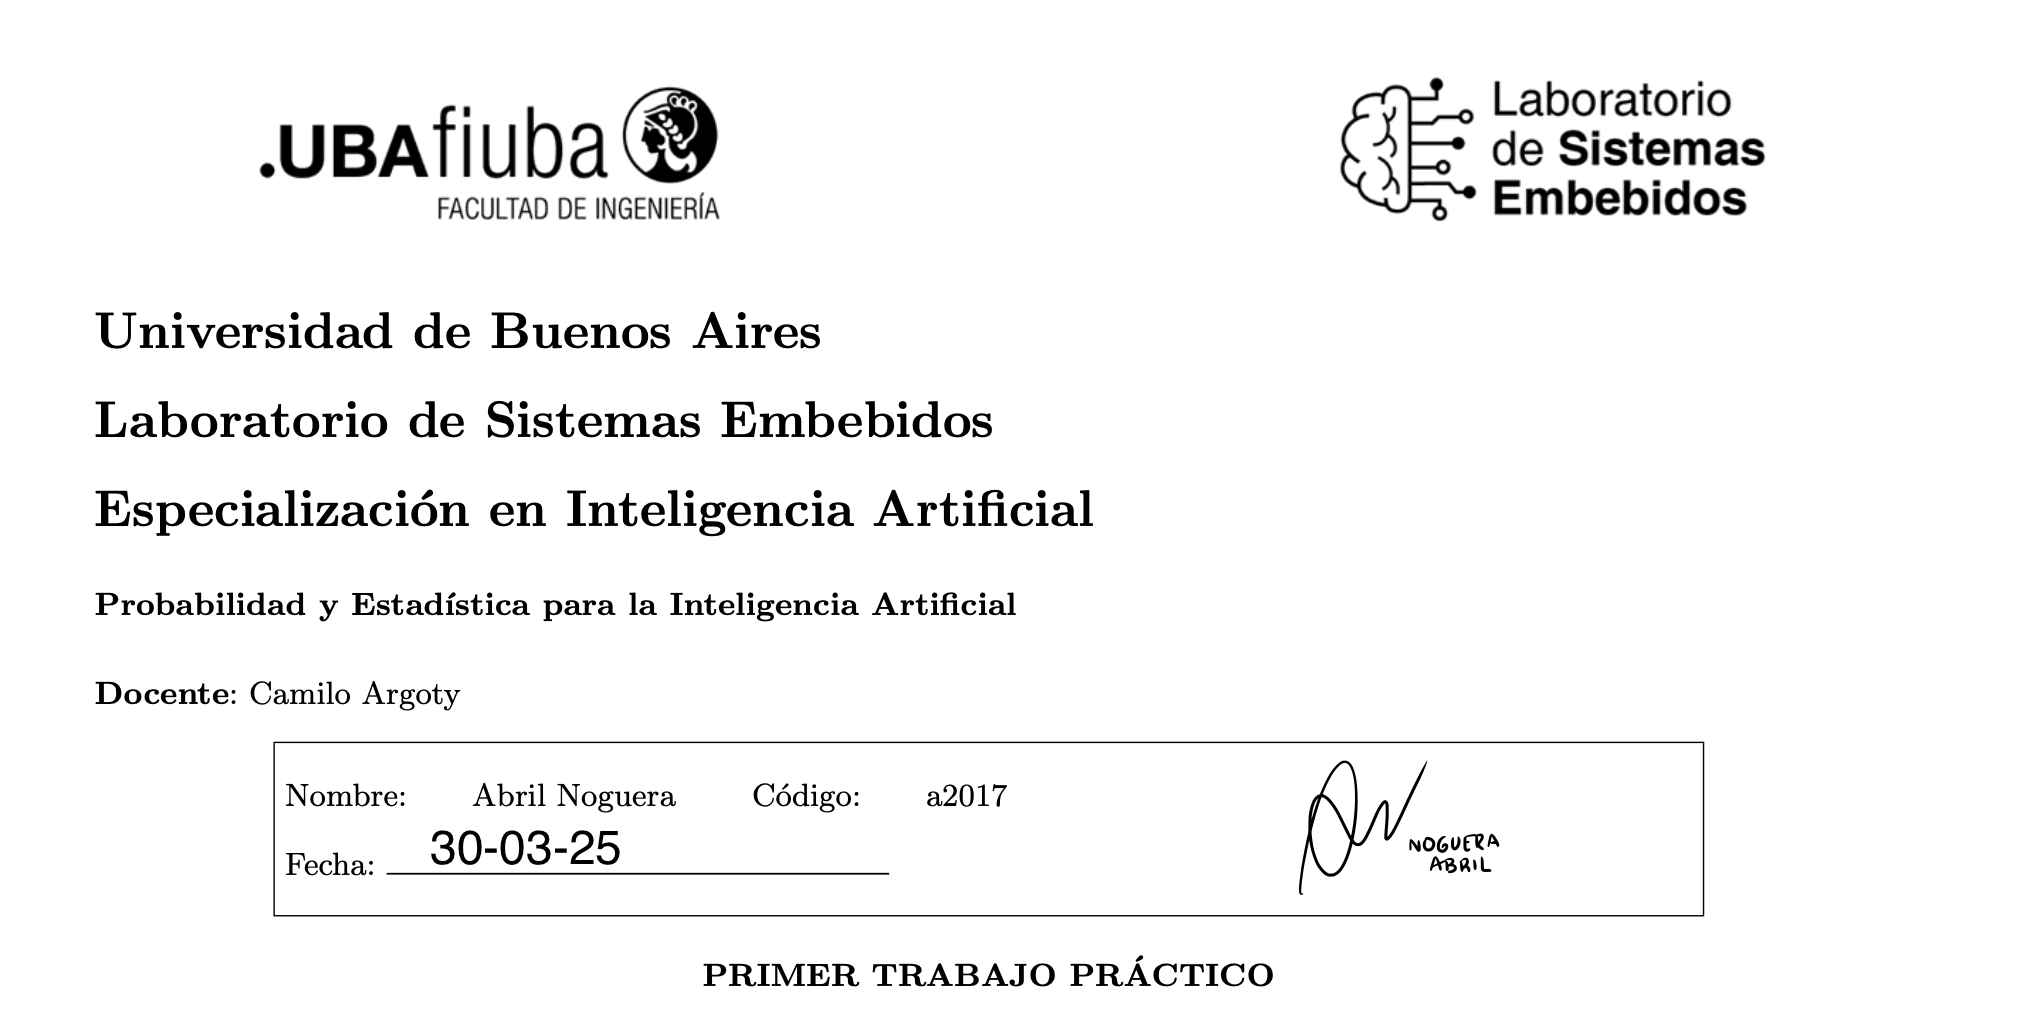

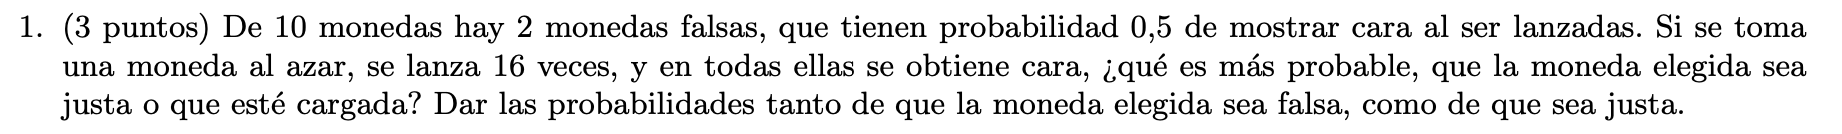

## Planteamiento del Problema

Total de monedas: 10

- Monedas justas (J): 8 (probabilidad de cara = 0.5).

- Monedas falsas (F): 2 (probabilidad de cara = 0.5).

Experimento: Se elige una moneda al azar y se lanza 16 veces, obteniendo 16 caras seguidas.

Pregunta: ¿Es más probable que la moneda sea justa (J) o falsa (F)?

**Note: Las monedas cargadas en realidad son también monedas justas al tener probabilidad de 0.5**

In [28]:
import numpy as np
from anytree import Node, RenderTree

def analizar_monedas(total_monedas=10, monedas_falsas=2, prob_cara_falsa=0.5, lanzamientos=16):
    """
    Analiza la probabilidad de que una moneda sea justa o falsa después de obtener 'lanzamientos' caras seguidas.
    
    Args:
        total_monedas (int): Número de monedas totales (default: 10).
        monedas_falsas (int): Número de monedas falsas (default: 2).
        prob_cara_falsa (float): Probabilidad de cara en moneda falsa (default: 0.7).
        lanzamientos (int): Número de lanzamientos observados (default: 16).
    """
    print("=== Parametros ===")
    print(f"Total de Monedas: {total_monedas}")
    print(f"Monedas Falsas: {monedas_falsas}")
    print(f"Probabilidad de Cara en Moneda Falsa: {prob_cara_falsa}")
    print(f"Lanzamientos Observados: {lanzamientos}\n")

    monedas_justas = total_monedas - monedas_falsas
    
    # Probabilidades a priori
    P_J = monedas_justas / total_monedas
    P_F = monedas_falsas / total_monedas
    
    print("=== PROBABILIDADES A PRIORI ===")
    print(f"P(Moneda Justa): {P_J:.4f}  ({monedas_justas}/{total_monedas})")
    print(f"P(Moneda Falsa): {P_F:.4f}  ({monedas_falsas}/{total_monedas})\n")
    
    # Probabilidad de 'lanzamientos' caras seguidas dado el tipo de moneda
    P_caras_J = 0.5 ** lanzamientos  # Moneda justa
    P_caras_F = prob_cara_falsa ** lanzamientos  # Moneda falsa
    
    print("=== PROBABILIDAD DE OBSERVAR LOS LANZAMIENTOS ===")
    print(f"P({lanzamientos} caras | Justa): 0.5^{lanzamientos} = {P_caras_J:.6f}")
    print(f"P({lanzamientos} caras | Falsa): {prob_cara_falsa}^{lanzamientos} = {P_caras_F:.6f}\n")
    
    # Probabilidad total de observar 'lanzamientos' caras
    P_caras_total = (P_caras_J * P_J) + (P_caras_F * P_F)
    
    print("=== PROBABILIDAD TOTAL (EVIDENCIA) ===")
    print(f"P({lanzamientos} caras) = [P({lanzamientos} caras | Justa)*P(Justa)] + [P({lanzamientos} caras | Falsa)*P(Falsa)]")
    print(f"                     = ({P_caras_J:.6f} * {P_J:.4f}) + ({P_caras_F:.6f} * {P_F:.4f})")
    print(f"                     = {P_caras_total:.6f}\n")
    
    # Probabilidades posteriores (Bayes)
    P_J_posterior = (P_caras_J * P_J) / P_caras_total
    P_F_posterior = (P_caras_F * P_F) / P_caras_total
    
    print("=== PROBABILIDADES POSTERIORES (TEOREMA DE BAYES) ===")
    print(f"P(Justa | {lanzamientos} caras) = [P({lanzamientos} caras | Justa)*P(Justa)] / P({lanzamientos} caras)")
    print(f"                           = ({P_caras_J:.6f} * {P_J:.4f}) / {P_caras_total:.6f}")
    print(f"                           = {P_J_posterior:.6f}")
    print(f"\nP(Falsa | {lanzamientos} caras) = [P({lanzamientos} caras | Falsa)*P(Falsa)] / P({lanzamientos} caras)")
    print(f"                           = ({P_caras_F:.6f} * {P_F:.4f}) / {P_caras_total:.6f}")
    print(f"                           = {P_F_posterior:.6f}\n")
    
    
    # Árbol de decisión
    raiz = Node("Elección de Moneda")
    justa = Node(f"Moneda Justa (P={P_J:.4f})", parent=raiz)
    falsa = Node(f"Moneda Falsa (P={P_F:.4f})", parent=raiz)
    Node(f"{lanzamientos} caras seguidas (P={P_caras_J:.4f})", parent=justa)
    Node(f"{lanzamientos} caras seguidas (P={P_caras_F:.4f})", parent=falsa)
    
    # Imprimir árbol y resultados
    print("\n=== Árbol de Decisión ===")
    for pre, _, node in RenderTree(raiz):
        print(f"{pre}{node.name}")
    
    print("\n=== Resultados ===")
    print(f"Probabilidad de ser justa: {P_J_posterior:.4f}")
    print(f"Probabilidad de ser falsa: {P_F_posterior:.4f}")
    
    if P_J_posterior > P_F_posterior:
        print("\nConclusión: Es más probable que la moneda sea JUSTA.")
    else:
        print("\nConclusión: Es más probable que la moneda sea FALSA.")


In [29]:
analizar_monedas(total_monedas=10, monedas_falsas=2, prob_cara_falsa=0.5, lanzamientos=16)


=== Parametros ===
Total de Monedas: 10
Monedas Falsas: 2
Probabilidad de Cara en Moneda Falsa: 0.5
Lanzamientos Observados: 16

=== PROBABILIDADES A PRIORI ===
P(Moneda Justa): 0.8000  (8/10)
P(Moneda Falsa): 0.2000  (2/10)

=== PROBABILIDAD DE OBSERVAR LOS LANZAMIENTOS ===
P(16 caras | Justa): 0.5^16 = 0.000015
P(16 caras | Falsa): 0.5^16 = 0.000015

=== PROBABILIDAD TOTAL (EVIDENCIA) ===
P(16 caras) = [P(16 caras | Justa)*P(Justa)] + [P(16 caras | Falsa)*P(Falsa)]
                     = (0.000015 * 0.8000) + (0.000015 * 0.2000)
                     = 0.000015

=== PROBABILIDADES POSTERIORES (TEOREMA DE BAYES) ===
P(Justa | 16 caras) = [P(16 caras | Justa)*P(Justa)] / P(16 caras)
                           = (0.000015 * 0.8000) / 0.000015
                           = 0.800000

P(Falsa | 16 caras) = [P(16 caras | Falsa)*P(Falsa)] / P(16 caras)
                           = (0.000015 * 0.2000) / 0.000015
                           = 0.200000


=== Árbol de Decisión ===
Elección de Moned

Al tener la **misma probabilidad de cara (0.5) en monedas justas y falsas**, el resultado de 16 caras seguidas no proporciona información útil para distinguirlas. Por lo tanto, las probabilidades posteriores se mantienen iguales a las iniciales (prior):

- La probabilidad de que sea justa sigue siendo 0.8.
- La probabilidad de que sea falsa sigue siendo 0.2.

En este caso, no hay actualización de creencias porque las monedas son indistinguibles en su comportamiento.

### ¿Qué pasa si la moneda falsa tiene P(cara) > 0.5?

Se hace la misma prueba destinando una **probabilidad de 0.7 de obtener cara en monedas falsas**.

In [30]:
analizar_monedas(total_monedas=10, monedas_falsas=2, prob_cara_falsa=0.7, lanzamientos=16)


=== Parametros ===
Total de Monedas: 10
Monedas Falsas: 2
Probabilidad de Cara en Moneda Falsa: 0.7
Lanzamientos Observados: 16

=== PROBABILIDADES A PRIORI ===
P(Moneda Justa): 0.8000  (8/10)
P(Moneda Falsa): 0.2000  (2/10)

=== PROBABILIDAD DE OBSERVAR LOS LANZAMIENTOS ===
P(16 caras | Justa): 0.5^16 = 0.000015
P(16 caras | Falsa): 0.7^16 = 0.003323

=== PROBABILIDAD TOTAL (EVIDENCIA) ===
P(16 caras) = [P(16 caras | Justa)*P(Justa)] + [P(16 caras | Falsa)*P(Falsa)]
                     = (0.000015 * 0.8000) + (0.003323 * 0.2000)
                     = 0.000677

=== PROBABILIDADES POSTERIORES (TEOREMA DE BAYES) ===
P(Justa | 16 caras) = [P(16 caras | Justa)*P(Justa)] / P(16 caras)
                           = (0.000015 * 0.8000) / 0.000677
                           = 0.018035

P(Falsa | 16 caras) = [P(16 caras | Falsa)*P(Falsa)] / P(16 caras)
                           = (0.003323 * 0.2000) / 0.000677
                           = 0.981965


=== Árbol de Decisión ===
Elección de Moned

La probabilidad de que la moneda sea falsa es mucho mayor. Aunque solo el 20% de las monedas esten cargadas, el resultado de 16 caras seguidas es tan inverosímil con una moneda justa que la conclusión se inclina decisivamente hacia la moneda falsa.

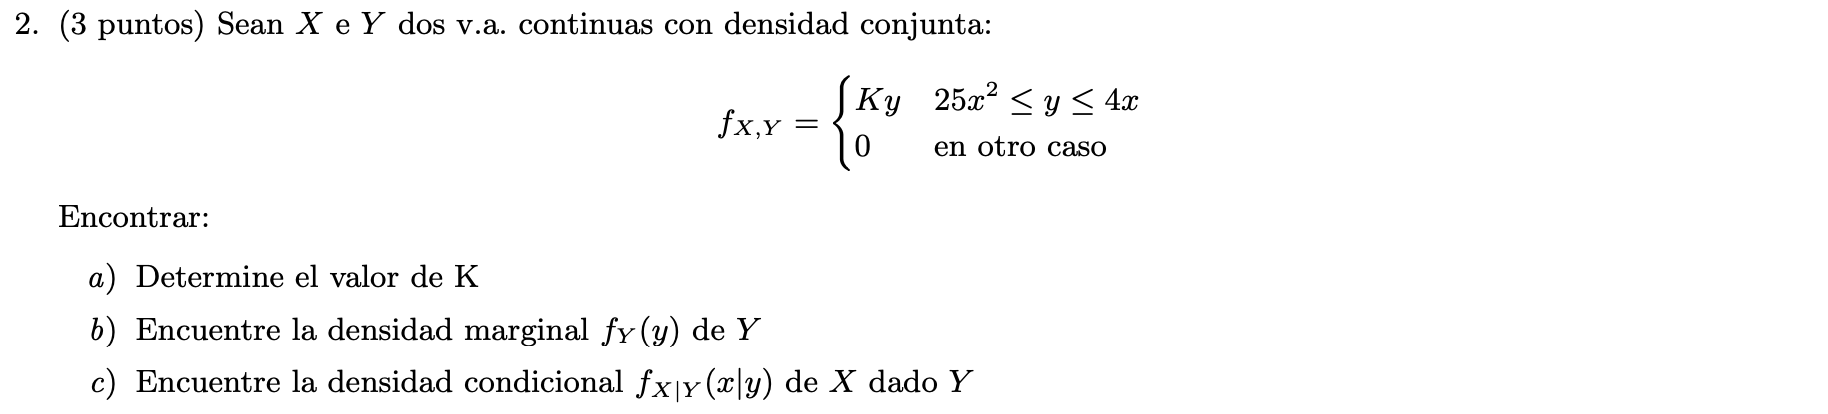

### a) Determine el valor de K

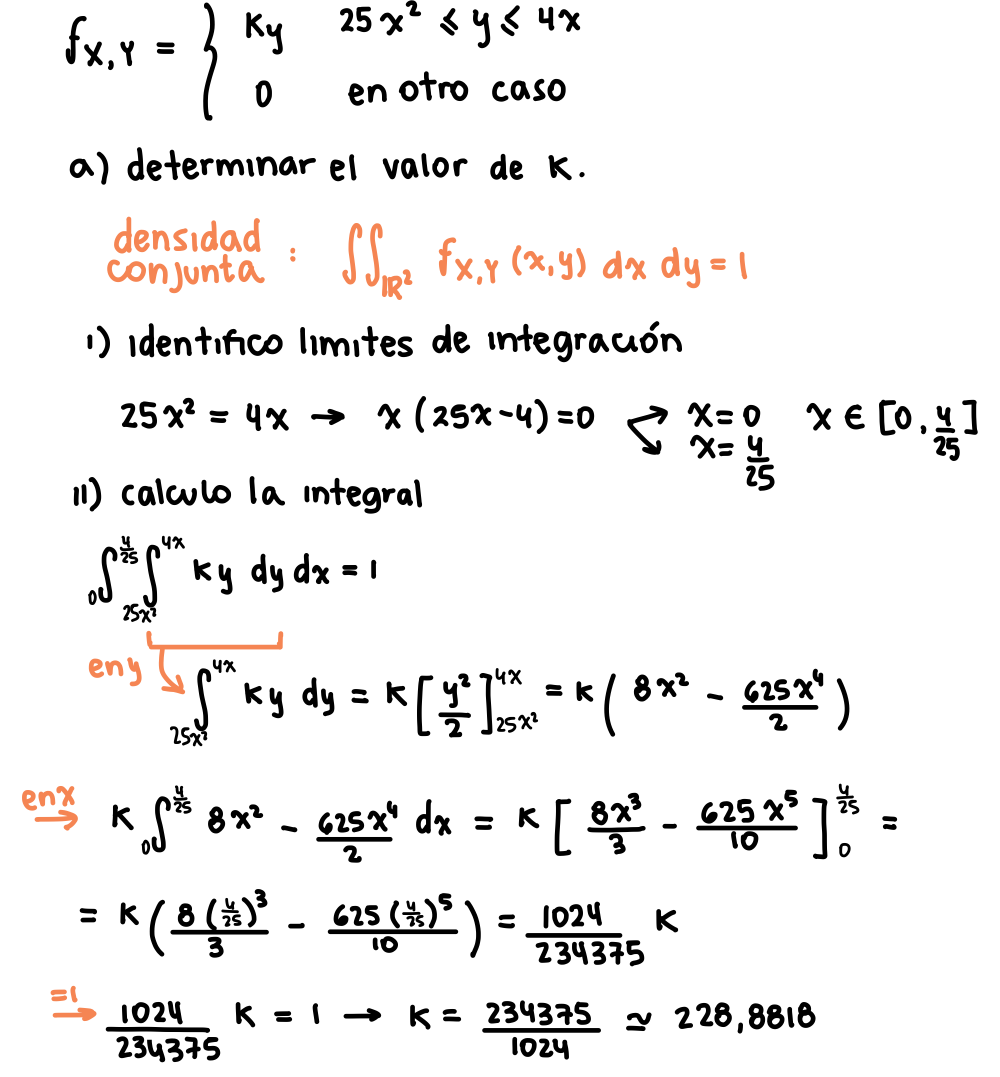

In [34]:
import sympy as sp
import numpy as np

# Definir variables simbólicas
x, y, K = sp.symbols('x y K', real=True, positive=True)

# =============================================
# a) Calcular el valor de K (normalización)
# =============================================

# Densidad conjunta f_{X,Y}(x,y) = K*y en la región 25x² ≤ y ≤ 4x
f_XY = K * y

# Límites de integración para x: resolver 25x² = 4x → x = 0 y x = 4/25
x_lim_inf = 0
x_lim_sup = 4 / 25

# Integral doble para normalizar (debe ser igual a 1)
integral_interior = sp.integrate(f_XY, (y, 25*x**2, 4*x))
integral_exterior = sp.integrate(integral_interior, (x, x_lim_inf, x_lim_sup))

# Resolver K: integral_exterior = 1
K_valor = sp.solve(integral_exterior - 1, K)[0]
print("a) Valor de K:", K_valor)

a) Valor de K: 228.881835937500


### Encuentre la densidad marginal fY(y) de Y

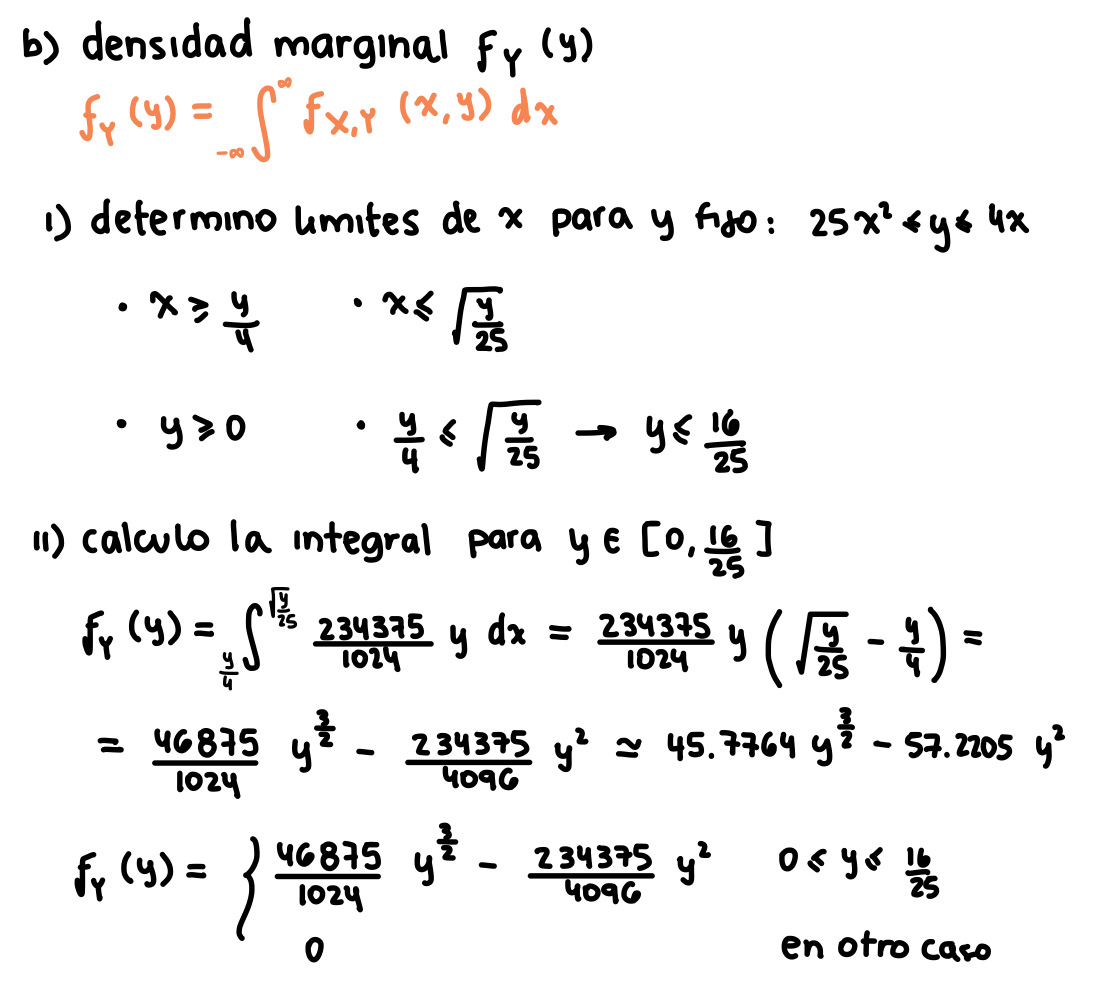

In [35]:
# =============================================
# b) Densidad marginal f_Y(y)
# =============================================

# Límites de y: y ∈ [0, 16/25] (porque 25x² ≤ y ≤ 4x)
y_lim_sup = 16 / 25

# Límites de x para y fijo: y/4 ≤ x ≤ √(y/25)
x_inf = y / 4
x_sup = sp.sqrt(y / 25)

# Integrar f_{X,Y}(x,y) sobre x para obtener f_Y(y)
f_Y = sp.integrate(f_XY.subs(K, K_valor), (x, x_inf, x_sup))
print("\nb) Densidad marginal f_Y(y):")
sp.pprint(f_Y)


b) Densidad marginal f_Y(y):
               3/2                    2
45.7763671875⋅y    - 57.220458984375⋅y 


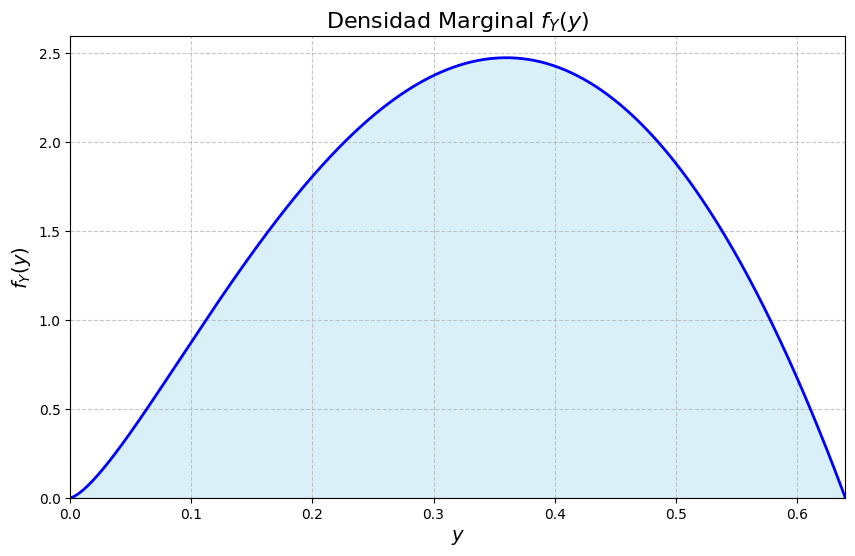

In [39]:
import matplotlib.pyplot as plt

# Convertir f_Y a función numérica para graficar
f_Y_numeric = sp.lambdify(y, f_Y, 'numpy')

# Crear valores de y en el rango [0, 16/25]
y_values = np.linspace(0, 16/25, 500)
f_Y_values = f_Y_numeric(y_values)

# Gráfico de la densidad marginal f_Y(y)
plt.figure(figsize=(10, 6))
plt.plot(y_values, f_Y_values, color='blue', linewidth=2)
plt.title('Densidad Marginal $f_Y(y)$', fontsize=16)
plt.xlabel('$y$', fontsize=14)
plt.ylabel('$f_Y(y)$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.fill_between(y_values, f_Y_values, color='skyblue', alpha=0.3)
plt.xlim(0, 16/25)
plt.ylim(0, None)
plt.show()

### Encuentre la densidad condicional fX|Y (x|y) de X dado Y

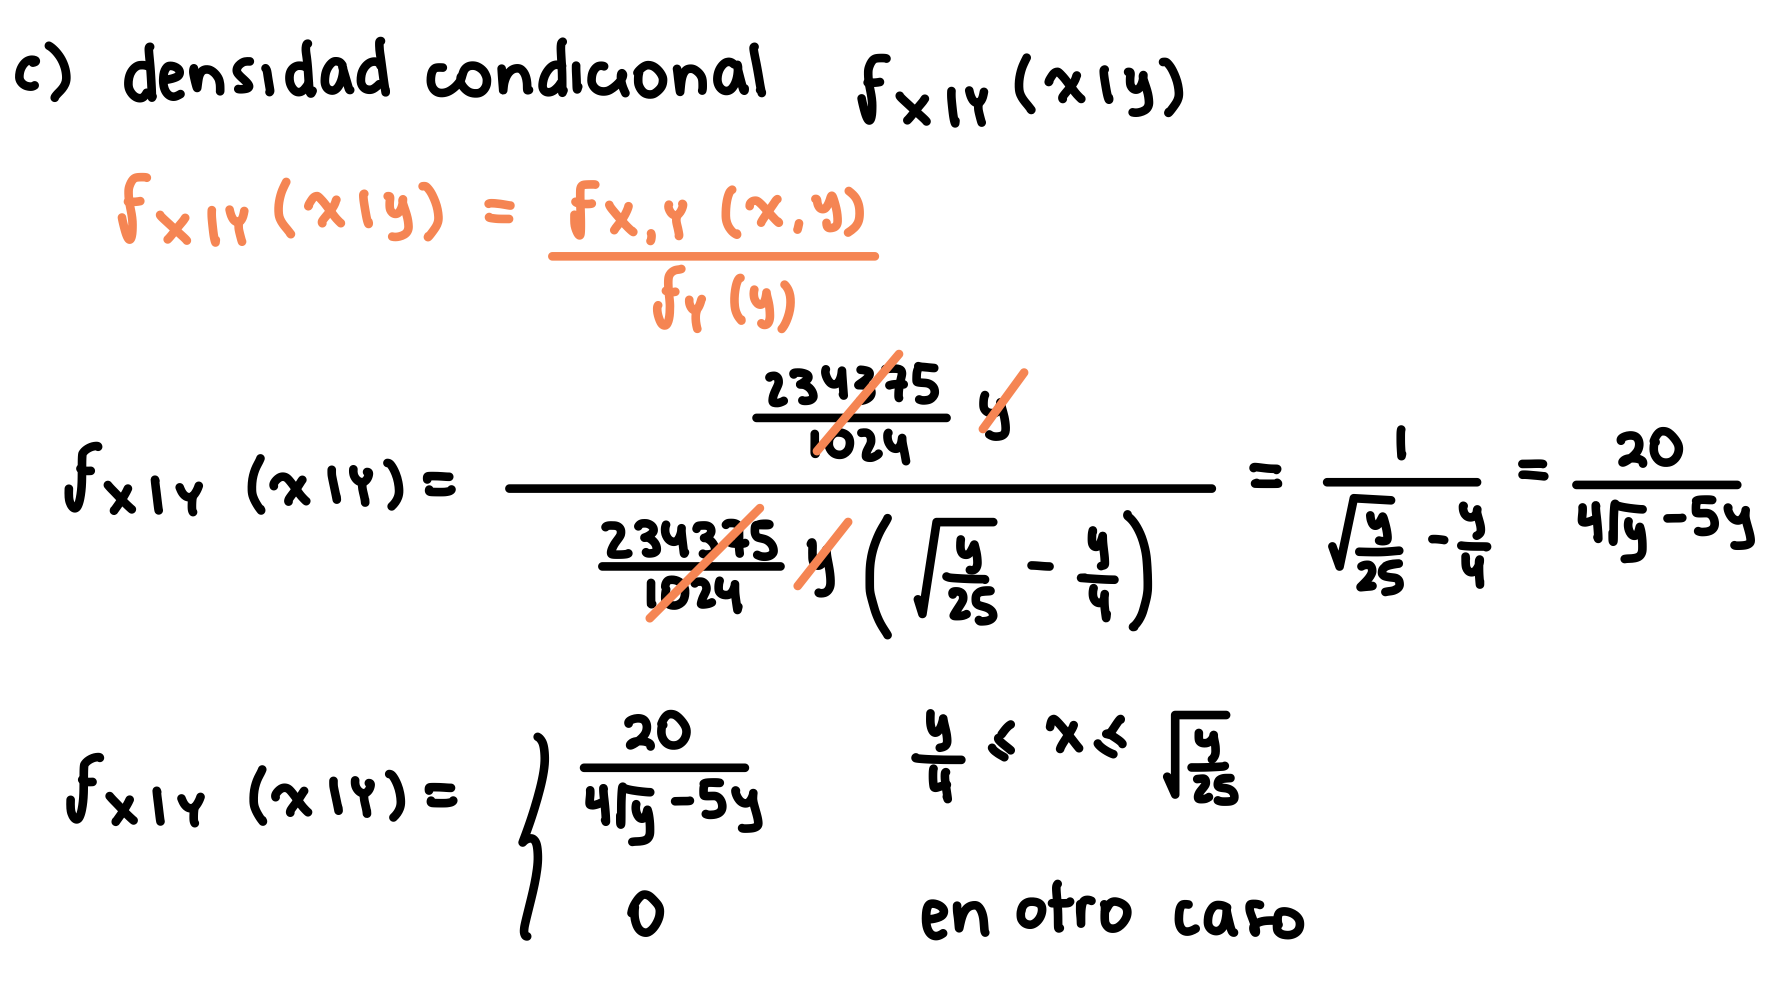

In [43]:
# =============================================
# c) Densidad condicional f_{X|Y}(x|y)
# =============================================

f_X_given_Y = f_XY.subs(K, K_valor) / f_Y
print("\nc) Densidad condicional f_{X|Y}(x|y):\n")
sp.pprint(f_X_given_Y)


c) Densidad condicional f_{X|Y}(x|y):

           228.8818359375⋅y            
───────────────────────────────────────
               3/2                    2
45.7763671875⋅y    - 57.220458984375⋅y 


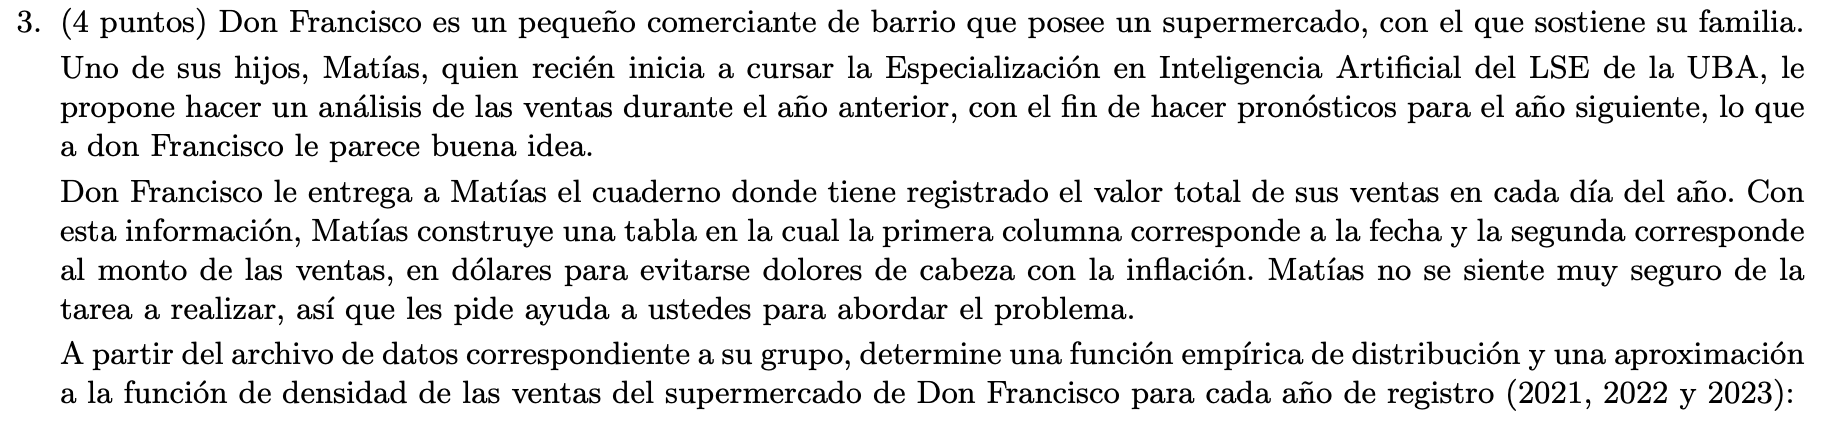

In [51]:
import pandas as pd

df = pd.read_excel("Datos_primer_TP_20Co2025_a2017.xlsx")

In [52]:
df.head()

,Fecha,Ventas
0,2021-01-01,12766.701233
1,2021-01-02,15744.349509
2,2021-01-03,17603.437166
3,2021-01-04,17629.888008
4,2021-01-05,19241.714589


In [92]:
df['Año'] = df['Fecha'].dt.year 
df['dia_del_año'] = df['Fecha'].dt.dayofyear 

### Ventas Diarias del Supermecado a lo largo de los Años

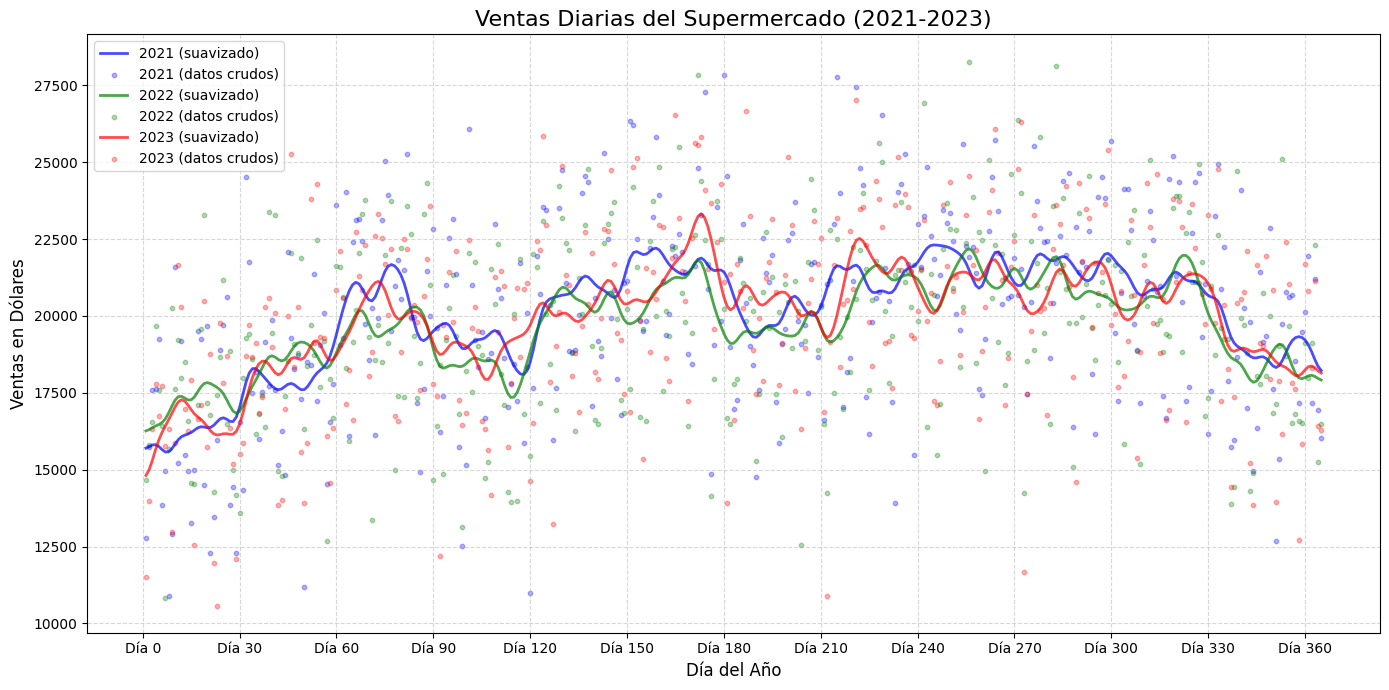

In [93]:
from scipy.ndimage import gaussian_filter1d

# Configurar gráfico
plt.figure(figsize=(14, 7))
años = df['Año'].unique()
colores = ['blue', 'green', 'red']  # Un color por año

# Graficar serie temporal por año
for año, color in zip(años, colores):
    df_año = df[df['Año'] == año]
    ventas_suavizadas = gaussian_filter1d(df_año['Ventas'], sigma=3)  # Suavizado
    plt.plot(df_año['dia_del_año'], 
             ventas_suavizadas, 
             label=f'{año} (suavizado)', 
             color=color, 
             alpha=0.7,
             linewidth=2)
    plt.scatter(df_año['dia_del_año'], 
               df_año['Ventas'], 
               color=color, 
               alpha=0.3,
               s=10,
               label=f'{año} (datos crudos)')

# 4. Personalizar gráfico
plt.title('Ventas Diarias del Supermercado (2021-2023)', fontsize=16)
plt.xlabel('Día del Año', fontsize=12)
plt.ylabel('Ventas en Dólares', fontsize=12)
plt.xticks(np.arange(0, 366, 30), labels=[f'Día {i}' for i in range(0, 366, 30)])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### Función Empírica de Distribución (CDF)
Para una variable aleatoria X (ventas diarias), la CDF se define como: FX(x) = P(X<=x)

La probabilidad acumulada de que las ventas diarias sean menores o iguales a un valor específico.

In [102]:
import numpy as np

def cdf_empirica(datos, x):
    datos_ordenados = np.sort(datos)
    n = len(datos)

    prob_acumulada = np.searchsorted(datos_ordenados, x, side='right') / n

    print(f"- La CDF empírica (probabilidad de ventas ≤ ${x}) es: {prob_acumulada:.2f} ({prob_acumulada*100:.0f}%)\n")

    return prob_acumulada

In [106]:
x = 20000
print(f"Definiendo x como ${x}\n")
for año in zip(años):
    print('Año :', np.int32(año)[0])
    df_año = df[df['Año'] == año]['Ventas'].values
    cdf_empirica(df_año, x)

Definiendo x como $20000

Año : 2021
- La CDF empírica (probabilidad de ventas ≤ $20000) es: 0.47 (47%)

Año : 2022
- La CDF empírica (probabilidad de ventas ≤ $20000) es: 0.54 (54%)

Año : 2023
- La CDF empírica (probabilidad de ventas ≤ $20000) es: 0.47 (47%)



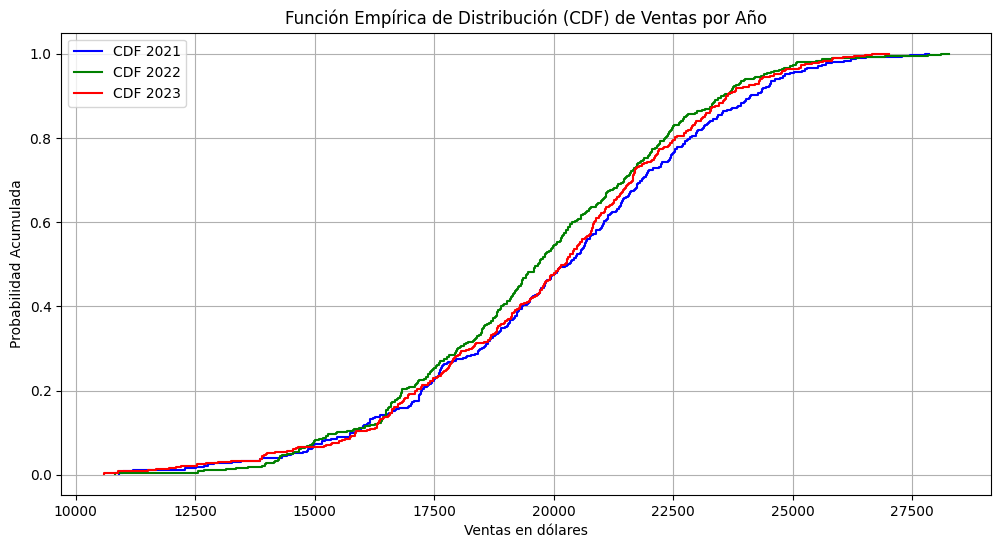

In [108]:
def plot_empirical_cdf(data, year, color):
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.step(sorted_data, y, label=f'CDF {year}', color=color)

plt.figure(figsize=(12, 6))
for año, color in zip(años, colores):
    df_año = df[df['Año'] == año]['Ventas'].values
    plot_empirical_cdf(df_año, str(año), color)
plt.title('Función Empírica de Distribución (CDF) de Ventas por Año')
plt.xlabel('Ventas en dólares')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
df.groupby('Año')['Ventas'].describe()

,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2021,365.0,20082.548050,3229.895938,10901.174491,17641.152381,20342.140961,22434.848276,27844.754020
2022,365.0,19697.257088,3024.879804,10815.563915,17491.851787,19694.176627,21895.220868,28270.101654
2023,365.0,19906.809559,3114.299003,10584.177191,17799.217434,20247.679842,22103.381450,27024.640575


#### Conclusiones CDF
- 2022 domina en probabilidades acumuladas para montos bajos/medios
- 2023 tiene una curva más empinada entre USD15,000 y USD 22,000 → Menor dispersión (ventas más agrupadas cerca de la moda).
- En 2022, el 54% de las ventas era de valores menores a USD 20,000. Mientras que en 2021 y 2023, el 47% de las ventas era de valores menores a USD 20,000.

### Estimación de Densidad Kernel (KDE)
Para una variable aleatoria continua X (ej: ventas diarias), la función de densidad fX(x) describe cómo se distribuye la probabilidad en cada punto x. 

El KDE estima esta densidad a partir de datos muestrales, sin asumir una forma paramétrica conocida (como la normal o exponencial).

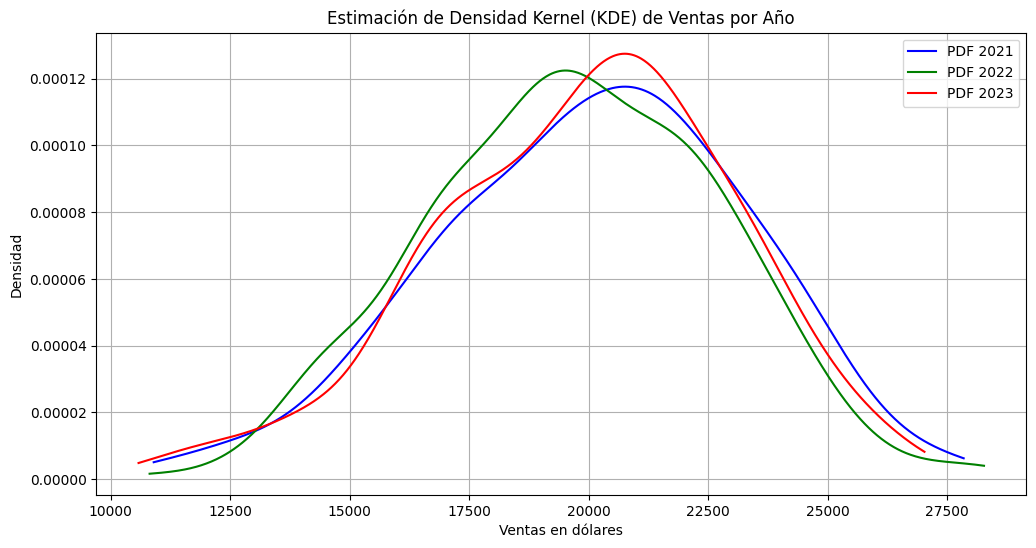

In [69]:
from scipy.stats import gaussian_kde

def plot_kde(data, year, color):
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)
    plt.plot(x, kde(x), label=f'PDF {year}', color=color)

plt.figure(figsize=(12, 6))
for año, color in zip(años, colores):
    df_año = df[df['Año'] == año]['Ventas'].values
    plot_kde(df_año, str(año), color)
plt.title('Estimación de Densidad Kernel (KDE) de Ventas por Año')
plt.xlabel('Ventas en dólares')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

#### Conclusiones KDE
- El KDE de 2023 tiene un pico más pronunciado en ~$20,500 USD, lo que indica que este año tuvo más días con ventas cercanas a ese valor.
- En 2023, el pico de densidad (moda) estuvo en ~$20,500 USD. Mientras que el año anterior estuvo en ~$19,500 USD. Las ventas más frecuentes aumentaron ~$1,000 USD en 2023, indicando un crecimiento en las ventas típicas.
- La curva de 2023 es más estrecha que la de 2021 y 2022, lo que significa menos variabilidad en las ventas diarias.

### Link al Notebook
Se puede encontrar el trabajo completo en el siguiente link: [Repositorio GitHub](https://github.com/abrilnoguera/MasterIA/tree/main/PEIA/TP1)